In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd
import numpy as py
import matplotlib.pyplot as plot
import seaborn as sns
from matplotlib import rc

import matplotlib.mlab as mlab

In [2]:
dfMain = pd.read_csv('main.csv', low_memory=False);
#Loads 'main.csv'

In [3]:
dfMain= dfMain.filter(['mainid','brgy','water','water_dist','fsmonth_1','fsdays_1','fsmonth_2','fsdays_2']);
# Filters the dataframe to show only the relevant columns for scoring water accessibility

# dfFood = dfMain.filter(['mainid','brgy','fshort','fsdays_1','fsdays_2']);
# Filters the dataframe to show only the relevant columns for scoring food security
# We will use dfFood later

dfMain

,mainid,brgy,water,water_dist,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2
0,1061066,186,1,0,NaN,0,NaN,0
1,555683,69,2,10,NaN,0,NaN,0
2,8611889,1,1,0,NaN,0,NaN,0
3,299398,165,2,5,NaN,0,NaN,0
4,136921,135,2,2,NaN,0,NaN,0
5,3842267,43,10,0,NaN,0,NaN,0
6,899855,201,1,0,NaN,0,NaN,0
7,235953,190,11,0,NaN,0,NaN,0
8,1591438,47,11,0,NaN,0,NaN,0
9,1053432,130,11,0,NaN,0,NaN,0


In [4]:
# The types of water sources are
# 1 Community water system-own
# 2 Community water system-shared
# 3 Deep well-own
# 4 Deep well-shared
# 5 Artesian well-own
# 6 Artesian well-shared
# 7 Dug/shallow well-own
# 8 Dug/shallow well-shared
# 9 River, stream, lake, spring, bodies of water
# 10 Bottled water
# 11 Tanker truck/Peddler
# 12 Other

# We based water security on the type of water supply source the family maintains.
# Our assumption is that family-owned water sources are more reliable than shared water sources because only they will be likely to have easy access to it.
# Based on that assumption, we'll create a new variable called water_own which is True (1) if the water source is owned by the family.
# Owned water sources are 1, 3, 5, 7, 10

dfMain['water_own'] = py.nan

for i, row in dfMain.iterrows():
    x = row['water']
    if (x == 1 or x == 3 or x == 5 or x == 7 or x == 10) :
        dfMain.at[i,'water_own']=1
    else:
        dfMain.at[i,'water_own']=0
    
dfMain

,mainid,brgy,water,water_dist,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_own
0,1061066,186,1,0,NaN,0,NaN,0,1.0
1,555683,69,2,10,NaN,0,NaN,0,0.0
2,8611889,1,1,0,NaN,0,NaN,0,1.0
3,299398,165,2,5,NaN,0,NaN,0,0.0
4,136921,135,2,2,NaN,0,NaN,0,0.0
5,3842267,43,10,0,NaN,0,NaN,0,1.0
6,899855,201,1,0,NaN,0,NaN,0,1.0
7,235953,190,11,0,NaN,0,NaN,0,0.0
8,1591438,47,11,0,NaN,0,NaN,0,0.0
9,1053432,130,11,0,NaN,0,NaN,0,0.0


In [5]:
dfMain['water_score'] = py.nan

for i, row in dfMain.iterrows():
    x = row['water_dist']
    z = row['water_own']
    if (x >= 0 and x < 6) :
        dfMain.at[i,'water_score']=1.0 * z
    elif (x > 5 and x < 251):
        dfMain.at[i,'water_score']= (1.0 - ((x - 5.0) / 246 )) * z
    elif (x > 250): 
        dfMain.at[i,'water_score']= 0.0
        
# Of course, all non-owned water sources automatically results to ZERO score thus the 'z' multiplier
# 1st conditional: Water source distance of 0 to 5 meters gets perfect score 1.
# 2nd conditional: Water source distance of 6 to 250 meters gets scored using a formula we made.
# There are 246 meters in between 5 and 251 thus the denominator of 246.
# 5 is subtracted from distance X because were counting distances after 5 meters.
# The quotient of (distance X minus 5) over 246 gets subtracted from the perfect score 1.

dfMain

,mainid,brgy,water,water_dist,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_own,water_score
0,1061066,186,1,0,NaN,0,NaN,0,1.0,1.0
1,555683,69,2,10,NaN,0,NaN,0,0.0,0.0
2,8611889,1,1,0,NaN,0,NaN,0,1.0,1.0
3,299398,165,2,5,NaN,0,NaN,0,0.0,0.0
4,136921,135,2,2,NaN,0,NaN,0,0.0,0.0
5,3842267,43,10,0,NaN,0,NaN,0,1.0,1.0
6,899855,201,1,0,NaN,0,NaN,0,1.0,1.0
7,235953,190,11,0,NaN,0,NaN,0,0.0,0.0
8,1591438,47,11,0,NaN,0,NaN,0,0.0,0.0
9,1053432,130,11,0,NaN,0,NaN,0,0.0,0.0


In [6]:
dfMain.water_score.unique()
# Checking if the formulas produced unique scores.

array([1.        , 0.        , 0.95934959, 0.89837398, 0.93902439,
       0.9796748 , 0.99593496, 0.20731707, 0.99186992, 0.81707317,
       0.98780488])

In [7]:
dfMain = dfMain.drop(columns=['water','water_dist','water_own'])
# Dropping columns we don't have use for anymore.
# We only need the water scores and the food related data from this point.

arrayWaterScores = dfMain.groupby('brgy')['water_score'].mean()
# Groups the families by brgy and takes the average of their water score.
# Output is an array, not a dataframe.

arrayWaterScores

In [23]:
arrayWaterScores.sort_values().unique()

array([0.        , 0.0078125 , 0.01052632, 0.01333333, 0.01877934,
       0.02272727, 0.03508772, 0.03669725, 0.03787879, 0.04580153,
       0.0462963 , 0.05136986, 0.05617978, 0.06395349, 0.06593407,
       0.06631679, 0.06666667, 0.08681135, 0.08943089, 0.09090909,
       0.09920635, 0.1       , 0.1013986 , 0.12418301, 0.12737127,
       0.13554217, 0.14216867, 0.15151515, 0.15801887, 0.1589404 ,
       0.16837482, 0.17346939, 0.17857143, 0.18548387, 0.19078947,
       0.19365079, 0.19469027, 0.19591837, 0.19622642, 0.19827586,
       0.20218579, 0.20486111, 0.21428571, 0.2173913 , 0.22666667,
       0.22799097, 0.22840691, 0.23569024, 0.23654996, 0.2417795 ,
       0.24767908, 0.24870466, 0.25185185, 0.2527881 , 0.25793532,
       0.26415094, 0.26609776, 0.2744186 , 0.28066914, 0.28571429,
       0.28763441, 0.28912345, 0.29577465, 0.29665072, 0.29895105,
       0.30136986, 0.30541872, 0.30672269, 0.31919192, 0.32171315,
       0.32266667, 0.33823529, 0.34057971, 0.34875445, 0.35769

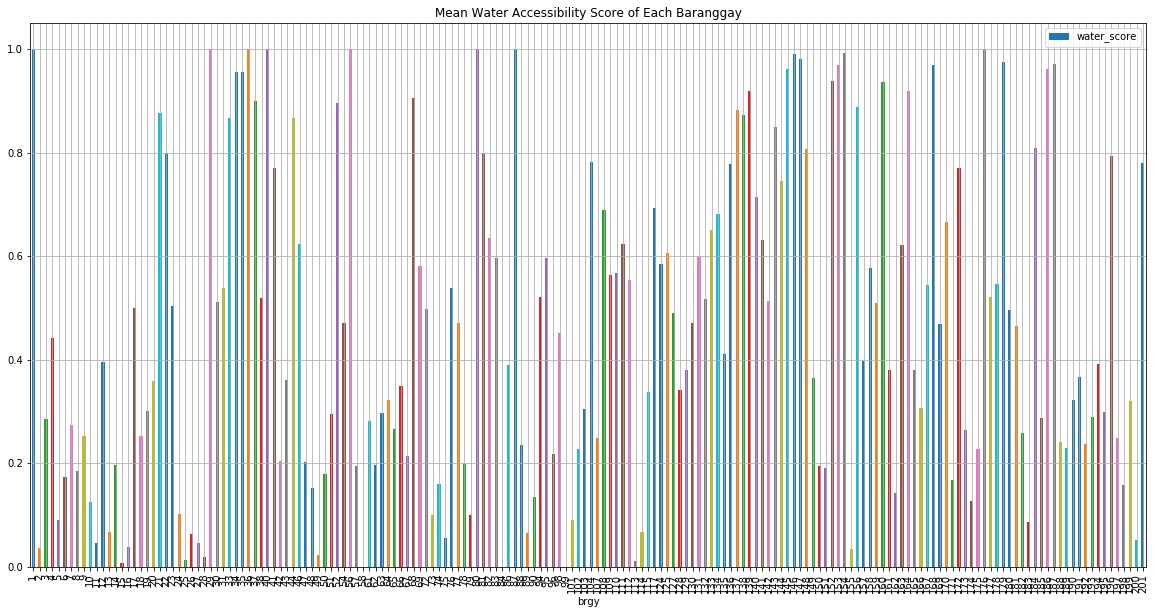

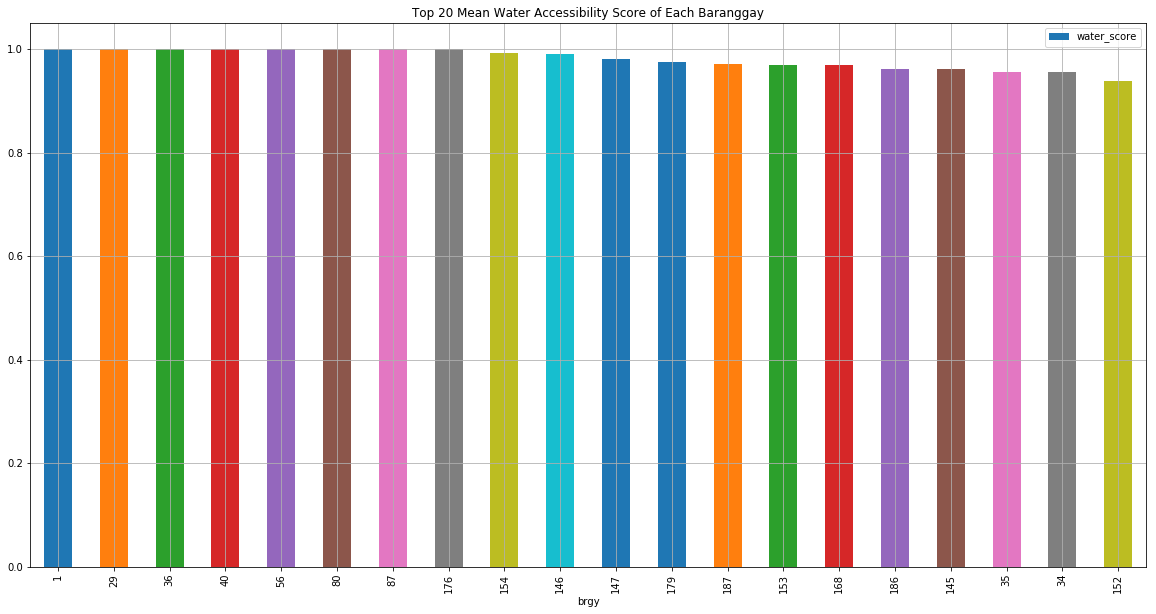

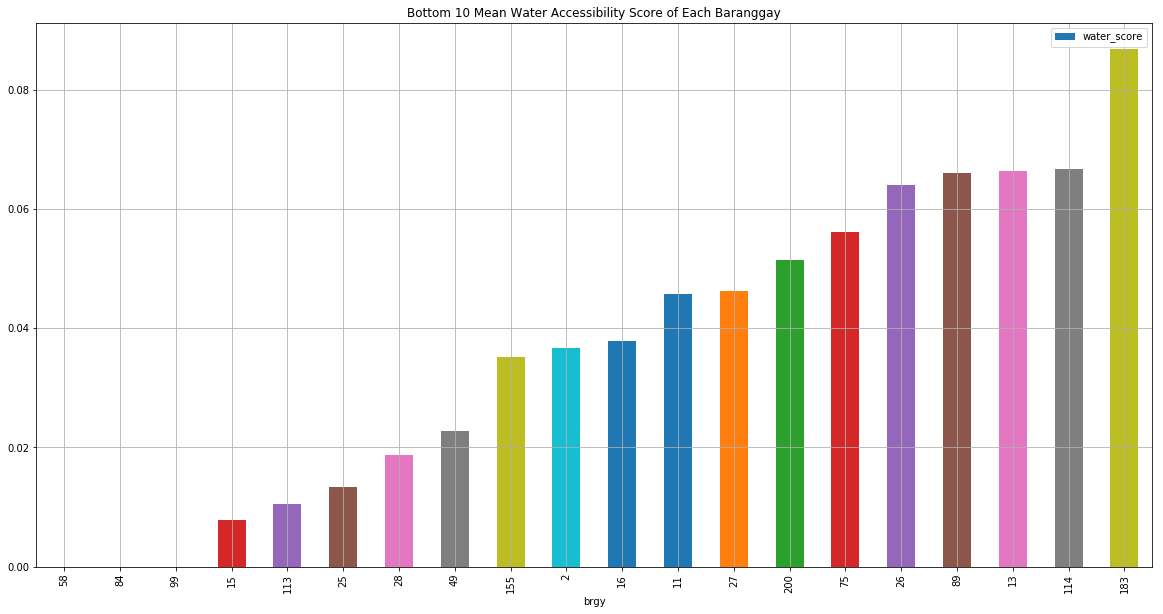

In [26]:
arrayWaterScores.plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.title('Mean Water Accessibility Score of Each Baranggay')
plot.legend()
plot.show()

arrayWaterScores.nlargest(20).plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.title('Top 20 Mean Water Accessibility Score of Each Baranggay')
plot.legend()
plot.show()
# Bar graph of the top 20 baranggays.

arrayWaterScores.nsmallest(20).plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.title('Bottom 10 Mean Water Accessibility Score of Each Baranggay')
plot.legend()
plot.show()
# Bar graph of the bottom 20 baranggays.

#dfMain.nsmallest(10, 'food_score').plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
#plot.title('Bottom 30 Mean Calamity-Useful Assets Ownership of Each Baranggay')
#plot.show()
# Shows the lowest 10 food scores

# Calamity Prep Score 3A

Explain later

In [11]:
dfMain['fsmonth_1'].fillna(0, inplace=True)
dfMain['fsmonth_2'].fillna(0, inplace=True)
# Converts all NaN values to 0 because non-response is assumed to indicate that they did not experience shortage

dfMain.sort_values(by=['fsmonth_1'], ascending=False)

,mainid,brgy,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_score
30539,713714,90,10.0,5,9.0,5,0.00000
19688,132167,162,9.0,3,8.0,3,0.00000
10944,2156377,201,9.0,30,10.0,30,0.00000
21429,833709,177,8.0,1,9.0,2,1.00000
57193,3254041,14,8.0,3,7.0,5,0.00000
21442,833745,177,8.0,2,9.0,1,0.00000
42041,1766515,46,7.0,7,8.0,7,1.00000
6410,132166,162,7.0,2,8.0,2,0.00000
31214,833324,201,7.0,1,8.0,2,1.00000
3239,1111529,110,7.0,2,8.0,1,1.00000


In [12]:
# http://bagong.pagasa.dost.gov.ph/climate/tropical-cyclone-information
# According to PAGASA, storms are most prevalent in August with up to 4 typhoons occcuring.
# Up to 3 for September and October, up to 2 in November and December
# Up to 1 for January and very unlikely in February.
# Assuming a normal distribution with August values at the peak, we assumed that the values for March to 
# July will mimic the typhoon frequency of August to January but in reverse order.
# Basing on this value, we created a 'month coefficient' scheme which grades the typhoon frequency 
# of each month relative to August's 4 per month. With 1.0 when typhoons are most frequent.
# Coefficient: The coefficient for each month is simply the number of typhoon
# in that month compared to the month with the most number of typhoons (August).

# https://www.businessinsider.com/how-many-days-can-you-survive-without-water-2014-5
# According to business insider, humans can only last up to 21 days without food and so we decided to divide the 
# shortage days by 21 so that 1.0 will be given to the shortage equalling or exceeding 21 days 
# and 0.0 when there's no food shortage at all.
# We then multiplied this value to the shortage's month coefficient since having shortages in August when typhoons are
# most frequent gives it the highest significance of 1.0 than if it were to occur in any other month.

# Shortage Weight or 'short_w' is the significance of the food shortage relative to typhoon freq. of each month.
# The Shortage Weight is calculated by dividing the shoratage days by 21 and then multiplying it to the month coefficient.
# 'short_w' = ('fsdays' / 21 days) * month_c

for i, row in dfMain.iterrows():
    x = row['fsmonth_1']
    d = row['fsdays_1']
    
    if(d > 21):
        d = 21
        # Converts all days greater than 21 to just 21 because the shortage weight 'short_w' must be at max 1
        # otherwise 'food_score' will have a negative value, and grades can't be negative, only 0.
        # Basing from businessInsider, any shortage lasting for more than 21 days is already deadly and
        # therefore we assume, automatically constitutes a food security score of 0.
        
    if (x == 2):
        dfMain.at[i,'short_w1']= 0
    elif (x == 1 or x == 3) :
        dfMain.at[i,'short_w1']= (d / 21) / 4
    elif (x == 4 or x == 5 or x == 11 or x == 12):
        dfMain.at[i,'short_w1']= (d / 21) * 2 / 4
    elif (x == 6 or x == 7 or x == 9 or x == 10):
        dfMain.at[i,'short_w1']= (d / 21) * 3 / 4
    elif (x == 8):
        dfMain.at[i,'short_w1']= (d / 21)
    else:
        dfMain.at[i,'short_w1']= 0
        
# The code above computes for the Shortage Weight of the shortage occuring in 'fsmonth_1'
        
    if (x == 2):
        dfMain.at[i,'short_w2']= 0
    elif (x == 1 or x == 3) :
        dfMain.at[i,'short_w2']= (d / 21) / 4
    elif (x == 4 or x == 5 or x == 11 or x == 12):
        dfMain.at[i,'short_w2']= (d / 21) * 2 / 4
    elif (x == 6 or x == 7 or x == 9 or x == 10):
        dfMain.at[i,'short_w2']= (d / 21) * 3 / 4
    elif (x == 8):
        dfMain.at[i,'short_w2']= (d / 21)
    else:
        dfMain.at[i,'short_w2']= 0
        
# The code above does the same thing but for 'fsmonth_2'

In [13]:
dfMain['food_score'] = 1 - ((dfMain['short_w1'] + dfMain['short_w2']) / 2)
# 'food_score' is the food security grade of each family based on their food shortage history.
# The mean of the two shortage weights is deducted from 1 to determine how prepared they are 
# in terms of food based on their past food shortage data.

dfMain.sort_values(by=['food_score'])
# Checking whether this has produced intended values.
# 10944 had 30 days of shortage on September (9).
# 30 days is converted to 21 because 21 is already the worst in terms of human survival without food.
# 21 / 21 = 1
# September has a coefficient of 3/4 or 0.75.
# 1 * 0.75 = 0.75

# 10944's short_w1 and short_w2 averages at 0.75
# 1 - 0.75 = 0.25

,mainid,brgy,fsmonth_1,fsdays_1,fsmonth_2,fsdays_2,water_score,short_w1,short_w2,food_score
10944,2156377,201,9.0,30,10.0,30,0.0,0.750000,0.750000,0.250000
11115,120628,135,4.0,30,5.0,30,0.0,0.500000,0.500000,0.500000
18727,145926,163,1.0,30,3.0,30,1.0,0.250000,0.250000,0.750000
42041,1766515,46,7.0,7,8.0,7,1.0,0.250000,0.250000,0.750000
26234,429626,189,6.0,5,7.0,3,0.0,0.178571,0.178571,0.821429
30539,713714,90,10.0,5,9.0,5,0.0,0.178571,0.178571,0.821429
2293,949698,69,7.0,5,5.0,3,0.0,0.178571,0.178571,0.821429
57193,3254041,14,8.0,3,7.0,5,0.0,0.142857,0.142857,0.857143
28835,2630326,179,7.0,3,8.0,1,1.0,0.107143,0.107143,0.892857
19688,132167,162,9.0,3,8.0,3,0.0,0.107143,0.107143,0.892857


In [14]:
arrayFoodScores = dfMain.groupby('brgy')['food_score'].mean()
# Groups the families by brgy and takes the average of the brgy's food score.
# Output is an array, not a dataframe.

arrayFoodScores.sort_values().unique()
# Checking if mean food score of each brgy varies.
# And it does but the values varies from 1 just a little.
# This means that on average, residents of each brgy rarely experience food shortages.
# The lowest score is 0.99770408

array([0.99770408, 0.99868697, 0.99892766, 0.99910022, 0.99917898,
       0.99946213, 0.99949439, 0.99951644, 0.99956971, 0.99959332,
       0.99965725, 0.9996941 , 0.99976285, 0.99982179, 0.99984092,
       0.99984867, 0.99985262, 0.99985423, 0.99986253, 0.99988348,
       0.99991752, 0.99993942, 0.99994202, 0.99994625, 0.99995243,
       0.99995763, 0.99995888, 1.        ])

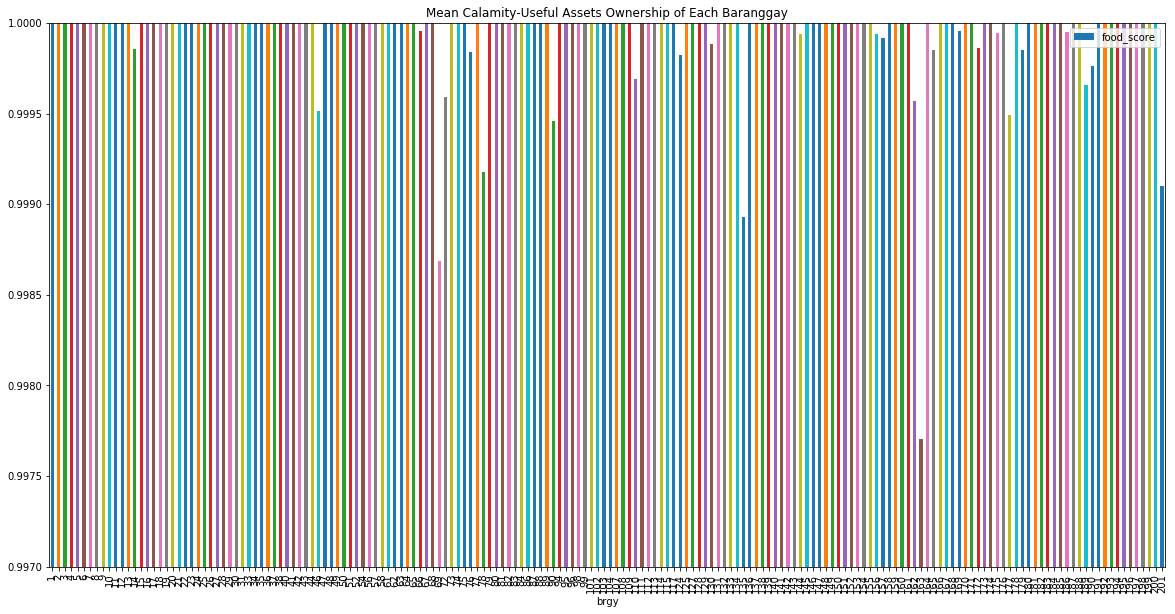

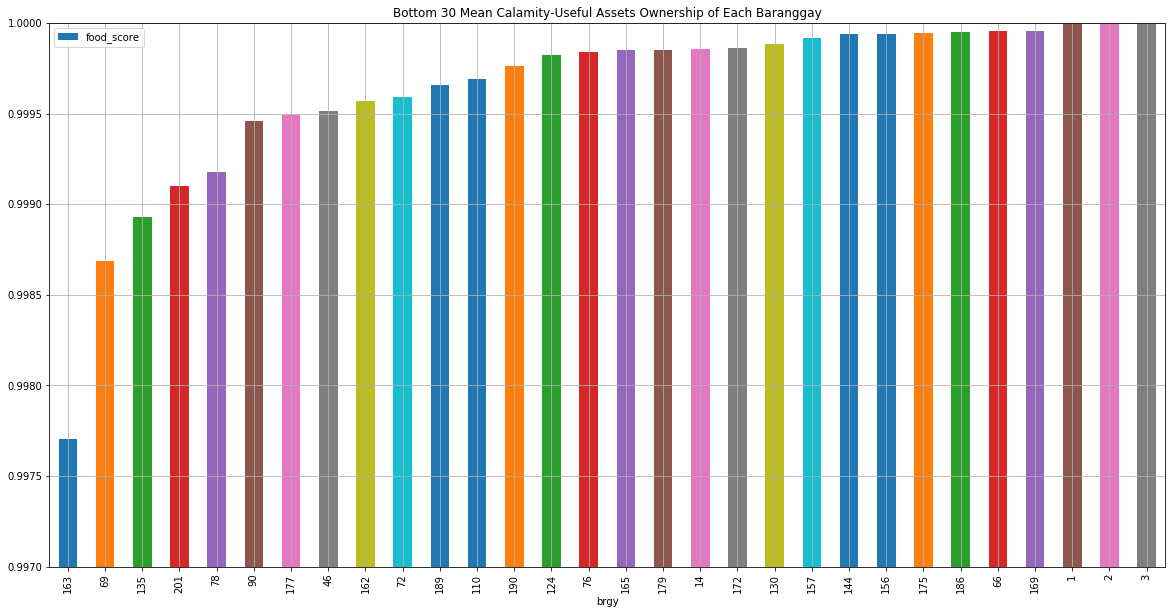

In [28]:
arrayFoodScores.plot(figsize=(20, 10), kind='bar', align='center', width=0.5, stacked=True)
plot.title('Mean Calamity-Useful Assets Ownership of Each Baranggay')
plot.ylim(0.997,1)
plot.legend()
plot.show()
# Plots the Food Scores to visualize data
# As proven by the checking we conducted earlier, most baranggays got a perfect 1.0 with little variation.
# Since no value went below 0.99770408, we made the 0.997 the lowest y-axis value so that we could
# display the difference between these scores better.

arrayFoodScores.nsmallest(30).plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
plot.title('Bottom 30 Mean Calamity-Useful Assets Ownership of Each Baranggay')
plot.ylim(0.997,1)
plot.legend()
plot.show()
# Bar graph of the bottom 30 baranggays.
# As evidenced by the last 3 of the 30 lowest baranggay already having a perfect score, we wont anymore show the Top 30

#dfMain.nsmallest(10, 'food_score').plot(figsize=(20, 10), kind='bar', grid=True, align='center', width=0.5, stacked=True)
#plot.title('Bottom 30 Mean Calamity-Useful Assets Ownership of Each Baranggay')
#plot.show()
# Shows the lowest 10 food scores